## Laboratorio 3 - Daily Total Female Births
Stefano Aragoni, Carol Arevalo

--------


1. Análisis Exploratorio:
Describir la serie de tiempo y visualizarla

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries

# Cargar los datos
dataframe = pd.read_csv("data/daily-total-female-births.csv", delimiter=",")

# Se imprime el dataframe
dataframe.head(10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


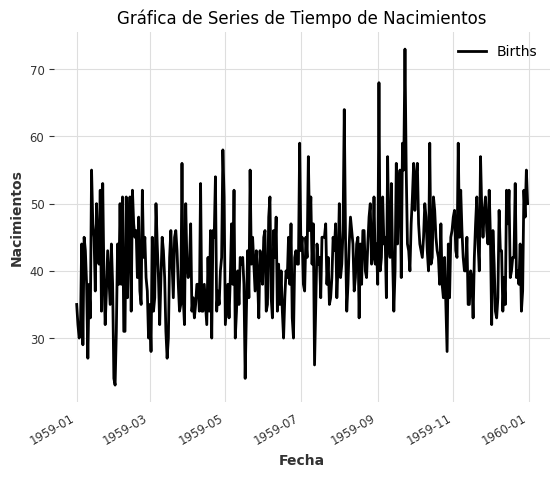

In [16]:
# Cargar la serie de tiempo
ts = TimeSeries.from_dataframe(dataframe, 'Date', 'Births')

# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
plt.show()

In [42]:
# Entrenamiento y validación
train, val = ts[:-36], ts[-36:]

Promedios:
• Aplicar métodos de promedios y comparar los resultados con el conjunto original

RMSE = 6.75
MAE = 5.78


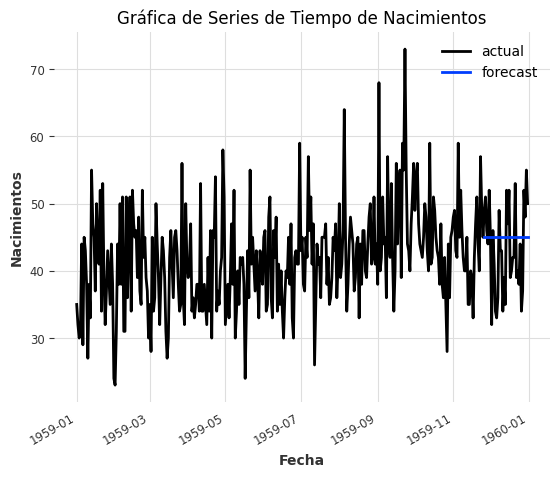

In [43]:
from darts.models import NaiveMovingAverage
from darts.metrics import rmse, mae

# Crear el modelo
model = NaiveMovingAverage()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='actual', ax=ax)
prediction.plot(label='forecast', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()


SARIMA:
• Identificar parámetros y ajustar un modelo SARIMA

In [ ]:
from darts.models import SARIMA

sarima_model = SARIMA(p=1, d=1, q=1, P=1, D=1, Q=1, s=12)
sarima_model.fit(ts)
sarima_forecast = sarima_model.predict(len(ts))

ts.plot(label='Original')
sarima_forecast.plot(label='SARIMA Forecast')
plt.legend()
plt.show()


Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.

In [ ]:
from darts.models import SimpleExponentialSmoothing, HoltWinters

ses = SimpleExponentialSmoothing()
holt = Holt()
holt_winters = HoltWinters()

ses.fit(ts)
holt.fit(ts)
holt_winters.fit(ts)

ts.plot(label='Original')
ses.predict(len(ts)).plot(label='Simple Exponential Smoothing')
holt.predict(len(ts)).plot(label='Holt')
holt_winters.predict(len(ts)).plot(label='Holt-Winters')
plt.legend()
plt.show()


Prophet:
• Utilizar Prophet para modelar la serie de tiempo.

In [ ]:
from fbprophet import Prophet

prophet_model = Prophet()
df_prophet = ts.pd_dataframe()
df_prophet.rename(columns={'fecha': 'ds', 'valor': 'y'}, inplace=True)

prophet_model.fit(df_prophet)
future = prophet_model.make_future_dataframe(periods=forecast_horizon)
forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
plt.show()


Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo

In [ ]:
from darts.models import RNNModel
from darts.utils.timeseries_generation import gaussian_timeseries

# Crear una serie de tiempo sintética (en caso de que no se tenga una serie real)
synthetic_ts = gaussian_timeseries(length=len(ts), freq='D', start_ts=ts.time_index[0])

rnn_model = RNNModel(input_chunk_length=32, output_chunk_length=10, n_epochs=100)
rnn_model.fit(synthetic_ts)
rnn_forecast = rnn_model.predict(forecast_horizon)

synthetic_ts.plot(label='Sintético')
rnn_forecast.plot(label='RNN Forecast')
plt.legend()
plt.show()


Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.
• Discutir cuál algoritmo se desempeña mejor para cada tipo de conjunto de datos y
por qué

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular métricas de evaluación para cada modelo
rmse_sarima = mean_squared_error(ts, sarima_forecast, squared=False)
mae_sarima = mean_absolute_error(ts, sarima_forecast)

rmse_rnn = mean_squared_error(synthetic_ts, rnn_forecast, squared=False)
mae_rnn = mean_absolute_error(synthetic_ts, rnn_forecast)

# Imprimir resultados
print(f'SARIMA RMSE: {rmse_sarima}, SARIMA MAE: {mae_sarima}')
print(f'RNN RMSE: {rmse_rnn}, RNN MAE: {mae_rnn}')
